#### Import modules and read data

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd

In [47]:
df_pfizer = pd.read_csv(os.getcwd() + '/Data/pfizer_cdc.csv', parse_dates = ['week']).drop(columns = ['Unnamed: 0'])
df_modr = pd.read_csv(os.getcwd() + '/Data/moderna_cdc.csv', parse_dates = ['week']).drop(columns = ['Unnamed: 0'])
df_jj = pd.read_csv(os.getcwd() + '/Data/jansen_cdc.csv', parse_dates = ['week']).drop(columns = ['Unnamed: 0'])

In [42]:
current = pd.to_datetime('2021-03-08')
current

Timestamp('2021-03-08 00:00:00')

In [48]:
# df_pfizer[df_pfizer['week'] < current]

#### Vaccine Orders Comparison

In [20]:
pfizer_gb = df_pfizer.groupby('week')
modr_gb = df_modr.groupby('week')

In [22]:
pfizer_sum = pfizer_gb.sum()
modr_sum = modr_gb.sum()

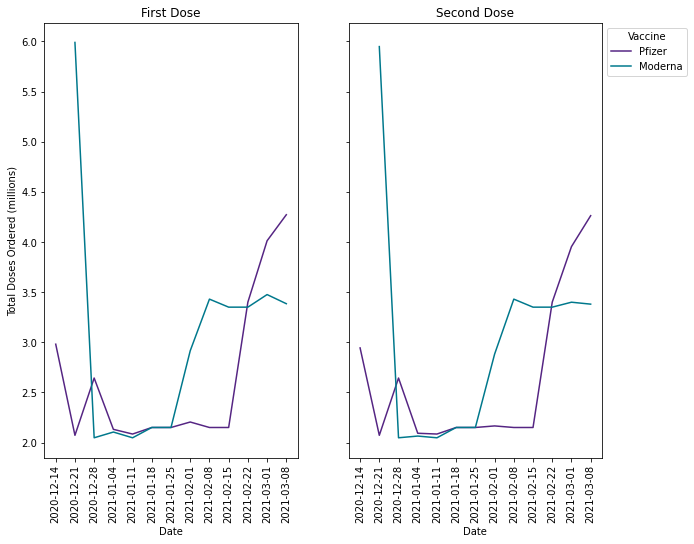

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (10, 8))

ax1.plot(pfizer_sum.index, pfizer_sum['first_dose'] / 1000000, color = '#552583', label = 'Pfizer')
ax1.plot(modr_sum.index, modr_sum['first_dose'] / 1000000, color = '#00788c', label = 'Moderna')
ax1.tick_params(axis = 'x', labelrotation = 90)
ax1.set_title('First Dose')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Doses Ordered (millions)')

ax2.plot(pfizer_sum.index, pfizer_sum['second_dose'] / 1000000, color = '#552583', label = 'Pfizer')
ax2.plot(modr_sum.index, modr_sum['second_dose'] / 1000000, color = '#00788c', label = 'Moderna')
ax2.tick_params(axis = 'x', labelrotation = 90)
ax2.set_title('Second Dose')
ax2.set_xlabel('Date')

plt.legend(loc = 2, bbox_to_anchor = (1, 1), title = 'Vaccine')
plt.show()
plt.close()